In [119]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install py-readability-metrics

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk

In [23]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tsantos1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsantos1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tsantos1\AppData\Roaming\nltk_data...


True

The articles highlight the alligations made against the new president of Harvard. The main focus is on the new counts of plagerism against President Gay. I thought the Fox News article is more focused on the alligations while reuters.com focuses more on the defense of the alligations. 


In [121]:
import PyPDF2

def extract_text_from_pdf(file_path):
    text = ""
    anomalies = []
    try:
        with open(file_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page_num in range(len(reader.pages)):
                page = reader.pages[page_num]
                text += page.extract_text()
    except Exception as e:
        anomalies.append(f"Error extracting text from {file_path}: {e}")
    return text, anomalies


In [123]:
file_path_1 = r'C:\Users\tsantos1\Downloads\foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf'
text_1, anomalies_1 = extract_text_from_pdf(file_path_1)
print("Text from the first PDF:\n", text_1)

Text from the first PDF:
 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harv

In [125]:
file_path_2 = r'C:\Users\tsantos1\Downloads\reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf'
text_2, anomalies_2 = extract_text_from_pdf(file_path_2)
print("\nText from the second PDF:\n", text_2)


Text from the second PDF:
 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, th

In [127]:
anomalies = anomalies_1 + anomalies_2
if anomalies:
    print("\nAnomalies noted:")
    for anomaly in anomalies:
        print(anomaly)

My code found no anomalies

In [129]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for the first article
sentiment_1 = sia.polarity_scores(text_1)
print("Sentiment analysis for the first article:\n", sentiment_1)

# Analyze sentiment for the second article
sentiment_2 = sia.polarity_scores(text_2)
print("\nSentiment analysis for the second article:\n", sentiment_2)

Sentiment analysis for the first article:
 {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}

Sentiment analysis for the second article:
 {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


This analysis shows me that the first article by fox news was less objective than the second by rueters. I inititally thought that the 2nd article was more objective but I was wrong in thinking that the 2nd article was more postive towards the president and the aligations. I agree that the first article was less objective but I do not think it was more positive. 

In [131]:
# Headlines of the articles
headline_1 = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
headline_2 = "Harvard president will submit dissertation edits after plagiarism allegations"

sia = SentimentIntensityAnalyzer()

sentiment_headline_1 = sia.polarity_scores(headline_1)
print("Sentiment analysis for the first headline:\n", sentiment_headline_1)

sentiment_headline_2 = sia.polarity_scores(headline_2)
print("\nSentiment analysis for the second headline:\n", sentiment_headline_2)

Sentiment analysis for the first headline:
 {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}

Sentiment analysis for the second headline:
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


These results do agree with the first sentiment test. The second article had more neutral text and a completely neutral headline compared to the slightly negative headline procided by Fox

In [137]:
from readability import Readability

def calculate_readability_scores(text):
    r = Readability(text)
    flesch_kincaid = r.flesch_kincaid().score
    dale_chall = r.dale_chall().score
    return flesch_kincaid, dale_chall

# Calculate readability scores for the first article
flesch_kincaid_1, dale_chall_1 = calculate_readability_scores(text_1)
print("Readability scores for the first article:")
print(f"Flesch-Kincaid: {flesch_kincaid_1}")
print(f"Dale-Chall: {dale_chall_1}")

# Calculate readability scores for the second article
flesch_kincaid_2, dale_chall_2 = calculate_readability_scores(text_2)
print("\nReadability scores for the second article:")
print(f"Flesch-Kincaid: {flesch_kincaid_2}")
print(f"Dale-Chall: {dale_chall_2}")

print("\nComparison of readability scores:")
print(f"First article - Flesch-Kincaid: {flesch_kincaid_1}, Dale-Chall: {dale_chall_1}")
print(f"Second article - Flesch-Kincaid: {flesch_kincaid_2}, Dale-Chall: {dale_chall_2}")

Readability scores for the first article:
Flesch-Kincaid: 19.21912993097889
Dale-Chall: 12.77964083329135

Readability scores for the second article:
Flesch-Kincaid: 18.706800340389325
Dale-Chall: 12.616721933836827

Comparison of readability scores:
First article - Flesch-Kincaid: 19.21912993097889, Dale-Chall: 12.77964083329135
Second article - Flesch-Kincaid: 18.706800340389325, Dale-Chall: 12.616721933836827


In [145]:
pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 409.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 525.1 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/301.2 kB 908.0 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 979.6 kB/s eta 0:00:00


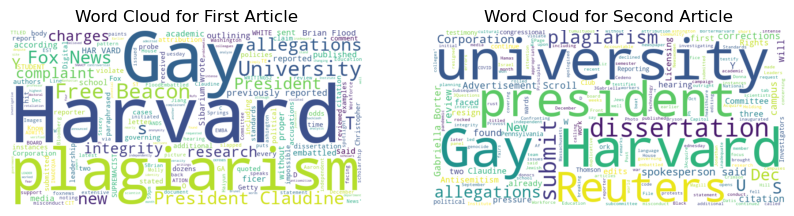

In [147]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)
wordcloud_2 = WordCloud(width=800, height=400, background_color='white').generate(text_2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for First Article')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.title('Word Cloud for Second Article')
plt.axis('off')

plt.show()

These word clouds do a great job of showing the main focus of the articles. Harvard's President Gay and Plagiarism. The word cloud covers the biggest of big pictures. 